# Training

In [28]:
import tensorflow as tf
import tensorflow.keras as keras
from nsp.model import create_model, only_recurrent_model

In [197]:
EMB_SIZE=1
model = only_recurrent_model(WINDOW, EMB_SIZE, learning_rate=0.0005)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=500, min_lr=0.0000001, verbose=0)
#checkpointer = ModelCheckpoint(filepath="test_normalizzato.hdf5", verbose=2, save_best_only=True)
import datetime
log_folder = "./log/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tbCallBack = keras.callbacks.TensorBoard(log_dir=log_folder, update_freq='epoch')
history = model.fit(X_train.reshape(len(X_train),-1,1), Y_train, 
              epochs = 100, 
              batch_size = 512, 
              verbose=2, 
              validation_data=(X_test.reshape(len(X_test),-1,1), Y_test),
              callbacks=[tbCallBack], #checkpointer, reduce_lr
              shuffle=True)

Epoch 1/100
533/533 - 12s - loss: 9186.0801 - val_loss: 10840.9951
Epoch 2/100
533/533 - 11s - loss: 9141.7217 - val_loss: 10801.5400
Epoch 3/100
533/533 - 11s - loss: 9104.0391 - val_loss: 10765.2822
Epoch 4/100
533/533 - 11s - loss: 9068.2734 - val_loss: 10730.0957
Epoch 5/100
533/533 - 11s - loss: 9033.3428 - val_loss: 10695.4355
Epoch 6/100
533/533 - 11s - loss: 8998.7949 - val_loss: 10661.0391
Epoch 7/100
533/533 - 11s - loss: 8964.4580 - val_loss: 10626.7725
Epoch 8/100
533/533 - 11s - loss: 8930.1641 - val_loss: 10592.5986
Epoch 9/100
533/533 - 11s - loss: 8896.0293 - val_loss: 10558.4795
Epoch 10/100
533/533 - 11s - loss: 8861.8750 - val_loss: 10524.3770
Epoch 11/100
533/533 - 11s - loss: 8827.8887 - val_loss: 10490.2998
Epoch 12/100
533/533 - 11s - loss: 8793.7480 - val_loss: 10456.2334
Epoch 13/100
533/533 - 11s - loss: 8759.7686 - val_loss: 10422.1680
Epoch 14/100
533/533 - 11s - loss: 8725.5381 - val_loss: 10388.1016
Epoch 15/100
533/533 - 11s - loss: 8691.5635 - val_loss: 

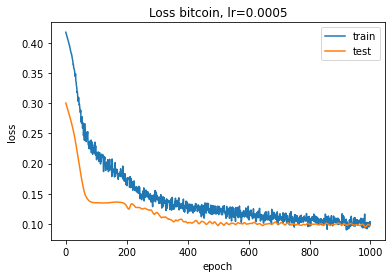

In [107]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss bitcoin, lr=0.0005')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
#plt.savefig('lr_0.0005_reduce-lr_model_big1.jpg')
plt.show()

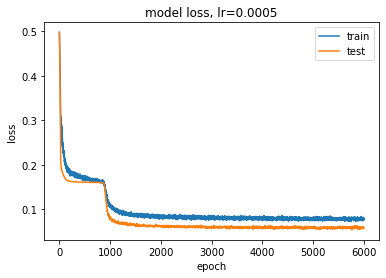

In [ ]:
# Save the weight and architecture of the neural network
model.save_weights('weights.h5', overwrite=True)
model.save('model.h5', overwrite=True)

# Save the network architecture in JSON format
model_json = model.to_json()
json_file = open("test.json", "w")
json_file.write(model_json)
json_file.close()